In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from file_utils import load_dataframes
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
sns.set_theme()

dataset_dir = 'data'

In [2]:
items = pd.read_csv(f'{dataset_dir}/items.csv', na_values='unknown',
                        dtype={'item_id': 'Int64', 'alley_id': 'Int64', 'category': 'Int64'})
items.drop(columns='Unnamed: 0', inplace=True)
items.dropna(subset=['item_id'], inplace=True)
items.set_index(['item_id'], inplace=True)

In [3]:
categories = pd.read_csv('data/categories.csv', index_col='category_id')
categories.drop(columns='Unnamed: 0', inplace=True)

In [4]:
alley_inventory = pd.read_csv('data/alley_inventory.csv', index_col='alley_id')

In [5]:
transaction_items__prior = pd.read_csv('data/transaction_items__prior.csv', na_values='unknown',
                                       dtype={'transaction_id': 'Int64', 'item_id': 'Int64',
                                              'add_to_cart_order': 'Int64', 'previous_bought': 'Int64'})

transaction_items__prior.drop(columns='Unnamed: 0', inplace=True)
transaction_items__prior.dropna(subset=['transaction_id'], inplace=True)
transaction_items__prior.set_index(['transaction_id'], inplace=True)

In [6]:
transactions = pd.read_csv('data/transactions.csv', na_values='unknown',
                               dtype={'transaction_id': 'Int64', 'customer_id': 'Int64', 'transaction_number': 'Int64',
                                      'day_of_week': 'Int64', 'time_of_day': 'Int64',
                                      'days_since_prior_order': 'Int64'})

transactions.drop(columns='Unnamed: 0', inplace=True)
transactions.dropna(subset=['transaction_id'], inplace=True)
transactions.set_index(['transaction_id'], inplace=True)

In [7]:
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
Index: 47616 entries, 1 to 49688
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  46130 non-null  object
 1   alley_id   46159 non-null  Int64 
 2   category   46138 non-null  Int64 
dtypes: Int64(2), object(1)
memory usage: 1.6+ MB


,item_name,alley_id,category
item_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


In [8]:
categories.info()
categories.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


,category
category_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [13]:
items_categories = pd.merge(items, categories, left_on='category', right_on='category_id')
items_categories = pd.merge(items_categories, alley_inventory, left_on='alley_id', right_on='alley_id')
items_categories.drop(columns=['category_x', 'alley_id'], inplace=True)
items_categories.rename(columns={'category_y': 'category'}, inplace=True)

In [14]:
items_categories

,item_name,category,alley
0,Chocolate Sandwich Cookies,snacks,cookies cakes
1,Nutter Butter Cookie Bites Go-Pak,snacks,cookies cakes
2,Danish Butter Cookies,snacks,cookies cakes
3,Gluten Free All Natural Chocolate Chip Cookies,snacks,cookies cakes
4,Mini Nilla Wafers Munch Pack,snacks,cookies cakes
...,...,...,...
44726,Organic Blueberries Package,bulk,bulk dried fruits vegetables
44727,Organic Black Mission Figs,bulk,bulk dried fruits vegetables
44728,Crystallized Ginger Chunks,bulk,bulk dried fruits vegetables
44729,Vegetable Chips,bulk,bulk dried fruits vegetables


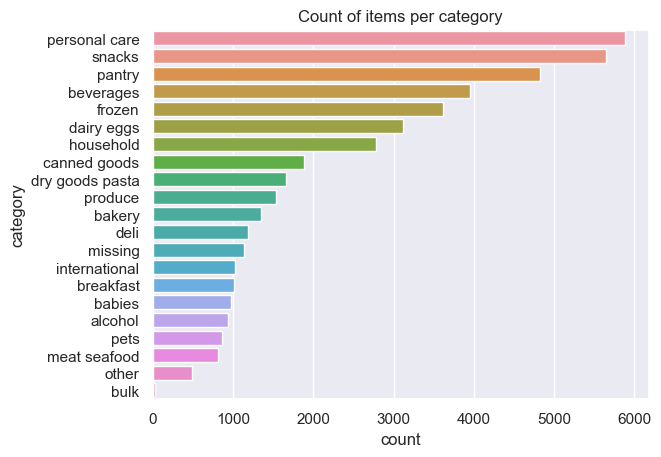

In [32]:
# countplot of categories
sns.countplot(y='category', data=items_categories, order=items_categories['category'].value_counts().index)
plt.title('Count of items per category')
plt.show()

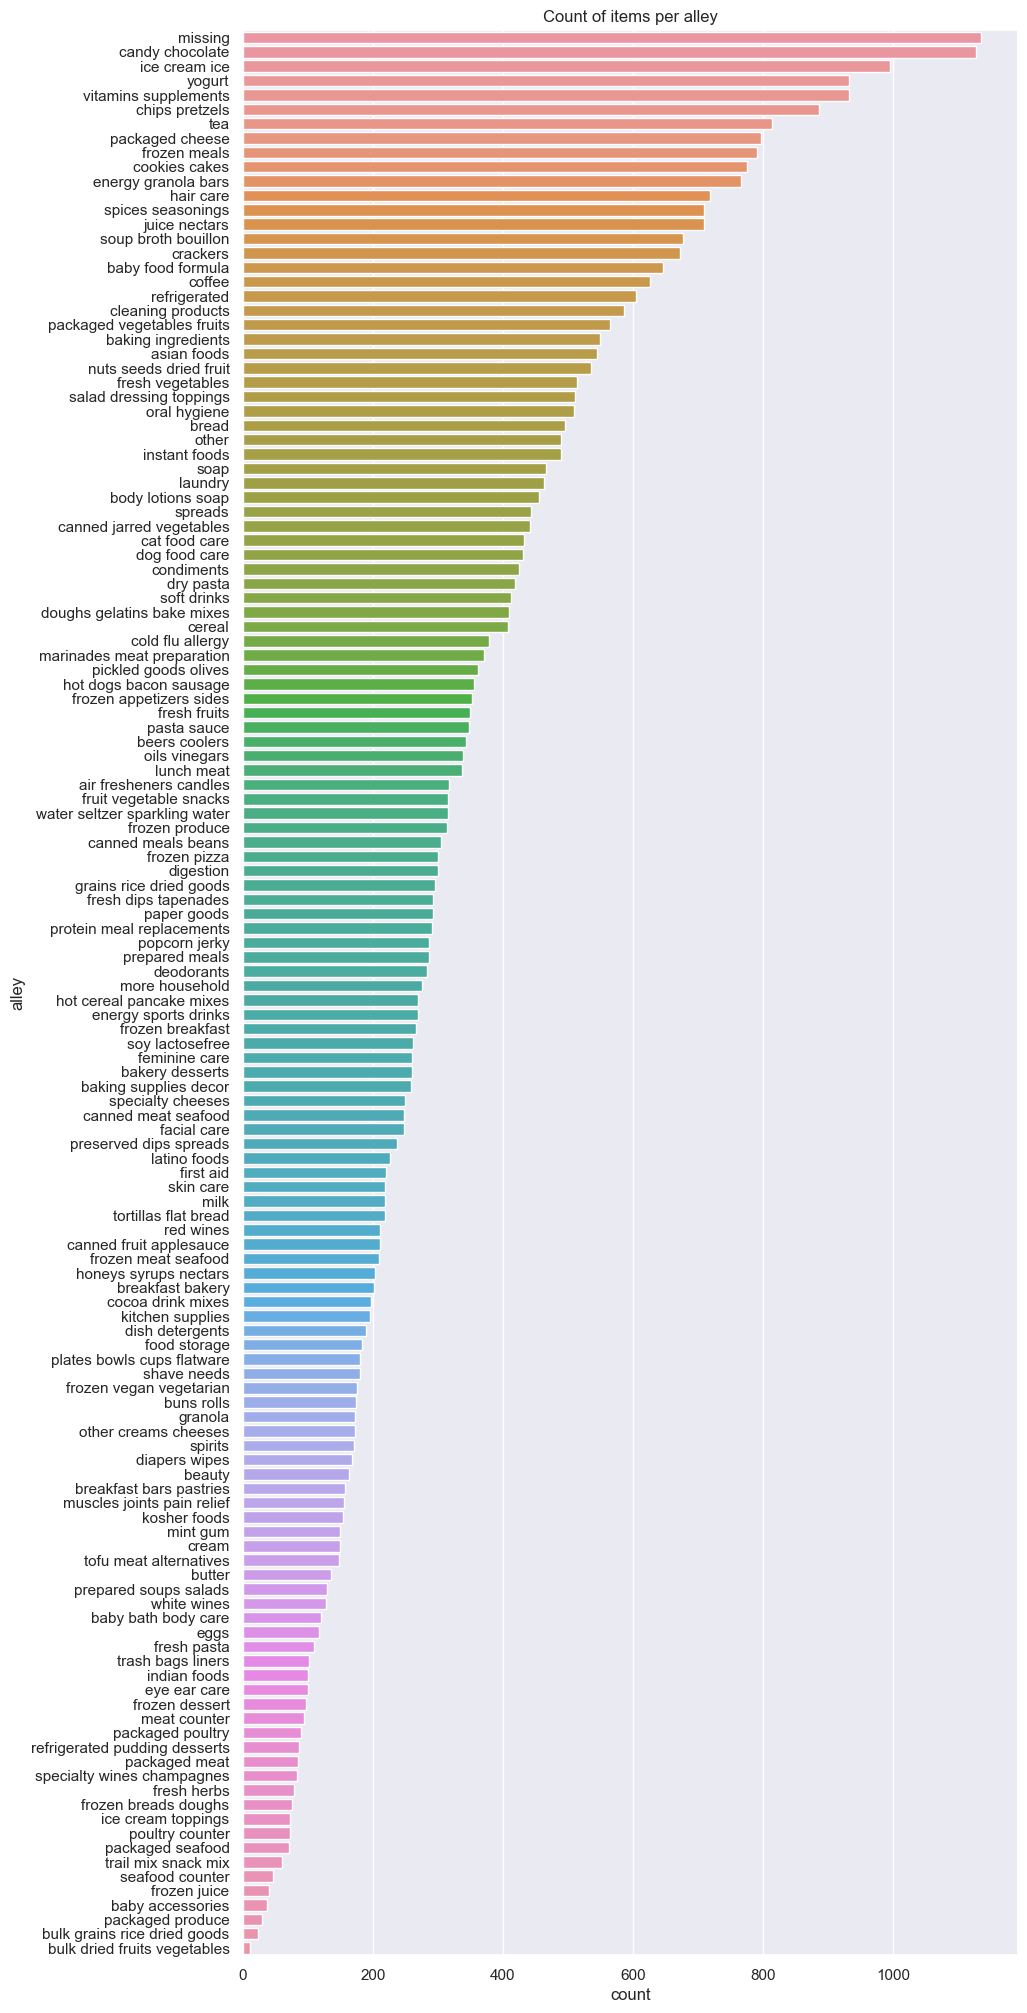

In [31]:
plt.figure(figsize=(10, 25))
sns.countplot(y='alley', data=items_categories, order=items_categories['alley'].value_counts().index)
plt.title('Count of items per alley')
plt.show()